## Mestrado em Sistemas Integrados de Apoio à Decisão

### Projeto de Grupo - Desenvolvimento de Poster Científico sobre Tomada de Decisão Baseada em Dados

#### Grupo 5
##### Elementos:
##### Pedro Conceição - Nº estudante 129188
##### Ricardo Mororó - Nº estudante 94562

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Análises univariadas e bivariadas

In [2]:
df_road = pd.read_csv("df_road", sep=";", index_col=False)

In [3]:
df_road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   12316 non-null  object
 1   Day_of_week            12316 non-null  object
 2   Age_band_of_driver     12316 non-null  object
 3   Driving_experience     12316 non-null  object
 4   Type_of_vehicle        12316 non-null  object
 5   Area_accident_occured  12316 non-null  object
 6   Lanes_or_Medians       12316 non-null  object
 7   Types_of_Junction      12316 non-null  object
 8   Cause_of_accident      12316 non-null  object
 9   Accident_severity      12316 non-null  object
dtypes: object(10)
memory usage: 962.3+ KB


In [4]:
list(df_road.columns.values.tolist())

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Driving_experience',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Types_of_Junction',
 'Cause_of_accident',
 'Accident_severity']

In [5]:
categorical_columns = df_road.select_dtypes(include=['object', 'category']).columns

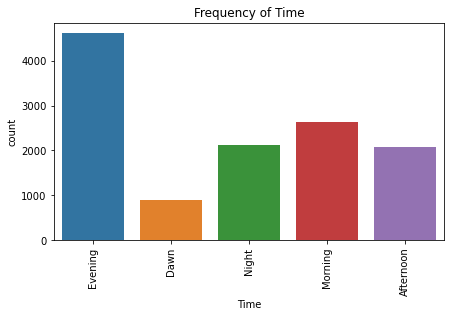

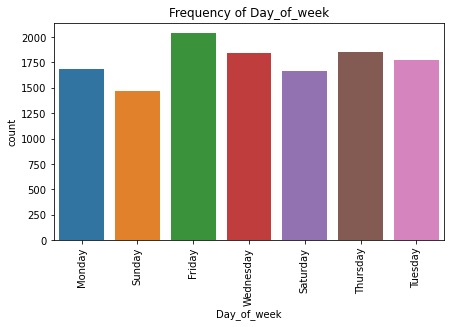

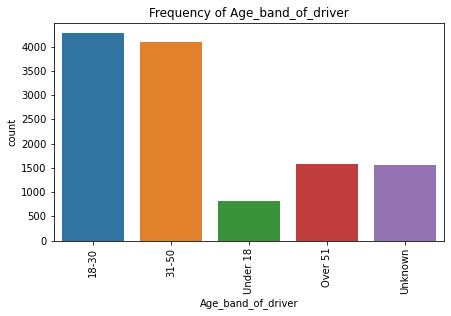

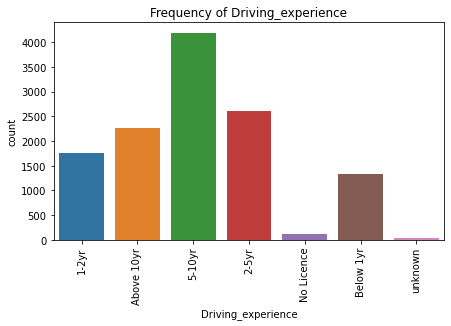

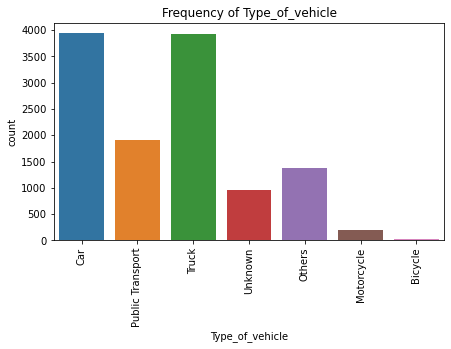

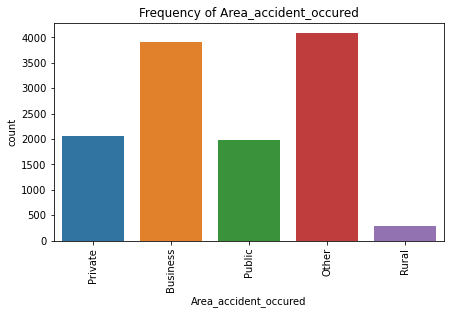

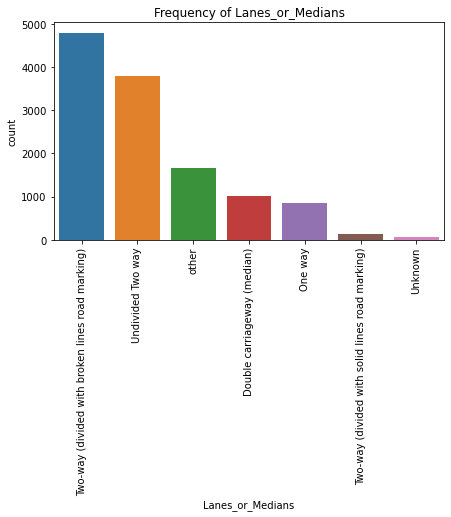

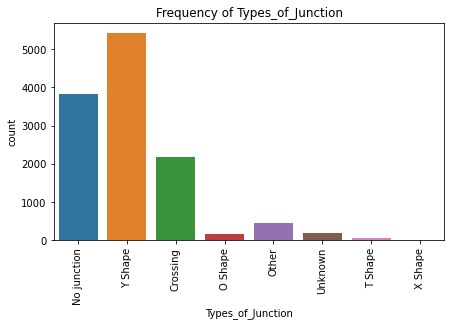

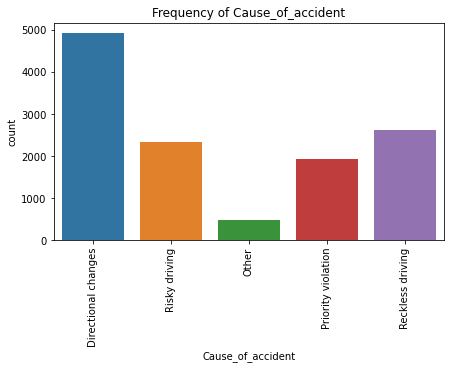

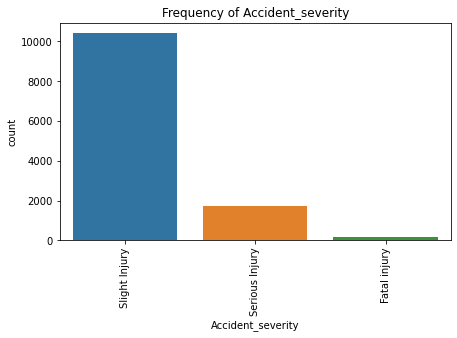

In [6]:
#gráficos de barras para auxiliar na visualização da distribuição de classes para cada variável categórica
for column in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_road, x=column)
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=90)
    plt.show()
    

## Questões a serem resolvidas com os dados

### Questão 1- A causa do acidente está relacionada com a idade e experiência do condutor?

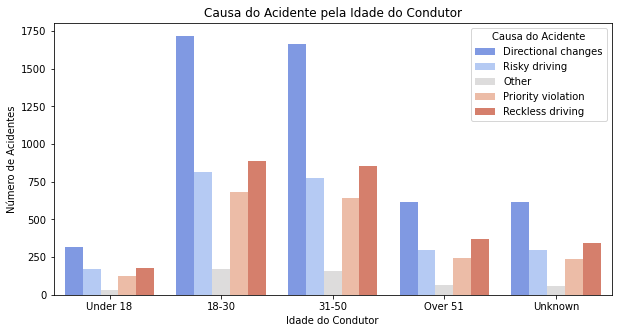

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_band_of_driver', hue='Cause_of_accident', data=df_road, palette='coolwarm',
             order = ['Under 18','18-30','31-50','Over 51','Unknown'])
plt.title('Causa do Acidente pela Idade do Condutor')
plt.xlabel('Idade do Condutor')
plt.ylabel('Número de Acidentes')
plt.legend(title='Causa do Acidente')
plt.xticks(rotation=0)
plt.show()

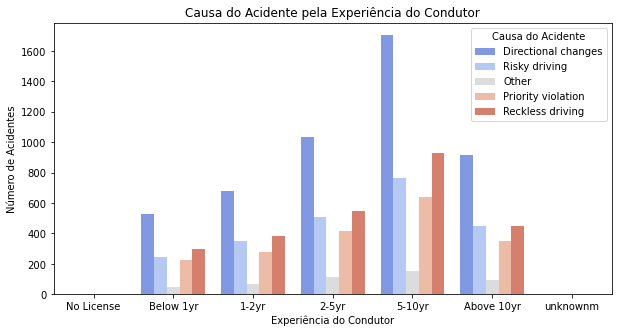

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Driving_experience', hue='Cause_of_accident', data=df_road, palette='coolwarm',
             order = ['No License','Below 1yr','1-2yr','2-5yr','5-10yr','Above 10yr','unknownm'])
plt.title('Causa do Acidente pela Experiência do Condutor')
plt.xlabel('Experiência do Condutor')
plt.ylabel('Número de Acidentes')
plt.legend(title='Causa do Acidente', loc=1)
plt.xticks(rotation=0)
plt.show()

### Questão 2 - O número de acidentes está relacionado com o período do dia e a área onde ocorrem?

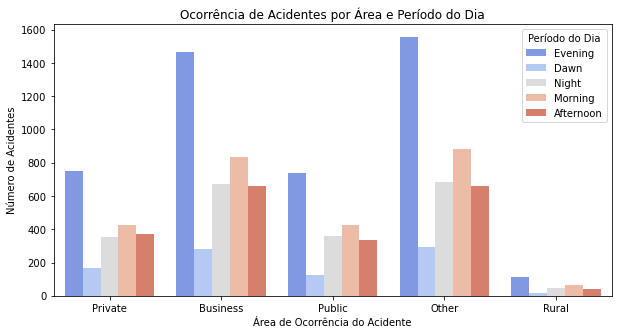

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Area_accident_occured', hue='Time', data=df_road, palette='coolwarm')
plt.title('Ocorrência de Acidentes por Área e Período do Dia')
plt.xlabel('Área de Ocorrência do Acidente')
plt.ylabel('Número de Acidentes')
plt.legend(title='Período do Dia', loc=1)
plt.xticks(rotation=0)
plt.show()

# Modeling

In [10]:
def cramers_v(x, y):
    """
    Compute Cramér's V for categorical variables x and y.
    x, y: categorical variables (can be pandas Series)
    """
    # Create the contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Cramér's V calculation
    n = contingency_table.sum().sum()  # Total number of observations
    v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    return v

In [11]:
def calculate_cramers_v_for_all_vars(df):
    """
    Calculate Cramér's V for all pairs of categorical variables in a DataFrame.
    """
    # List to store results
    cramer_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    
    # Iterate through all pairs of columns
    for var1 in df.columns:
        for var2 in df.columns:
            if var1 != var2:
                cramer_v_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])
            else:
                cramer_v_matrix.loc[var1, var2] = np.nan  # No self-comparison
    
    return cramer_v_matrix

In [12]:
from scipy.stats import chi2_contingency
cramer_v_result = calculate_cramers_v_for_all_vars(df_road)
print(cramer_v_result)

                           Time  Day_of_week  Age_band_of_driver  \
Time                        NaN     0.119244            0.065763   
Day_of_week            0.119244          NaN            0.034899   
Age_band_of_driver     0.065763     0.034899                 NaN   
Driving_experience     0.016373     0.020021            0.022933   
Type_of_vehicle        0.022380     0.018367            0.024213   
Area_accident_occured  0.016006     0.032084            0.023047   
Lanes_or_Medians       0.023148     0.024741            0.019795   
Types_of_Junction      0.052385     0.043164            0.052795   
Cause_of_accident      0.014951     0.019927            0.012891   
Accident_severity      0.049892     0.043776            0.049571   

                       Driving_experience  Type_of_vehicle  \
Time                             0.016373         0.022380   
Day_of_week                      0.020021         0.018367   
Age_band_of_driver               0.022933         0.024213   
Dri

#### Devido a baixíssima correlação entre as variáveis do dataframe, decidiu-se optar por uma análise com atenção apenas nas observações com severidade do acidente igual a fatal.

### Dataframe só com acidentes fatais

In [13]:
df_fatal = df_road[df_road['Accident_severity'] == 'Fatal injury']

In [14]:
df_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 89 to 12271
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   158 non-null    object
 1   Day_of_week            158 non-null    object
 2   Age_band_of_driver     158 non-null    object
 3   Driving_experience     158 non-null    object
 4   Type_of_vehicle        158 non-null    object
 5   Area_accident_occured  158 non-null    object
 6   Lanes_or_Medians       158 non-null    object
 7   Types_of_Junction      158 non-null    object
 8   Cause_of_accident      158 non-null    object
 9   Accident_severity      158 non-null    object
dtypes: object(10)
memory usage: 13.6+ KB


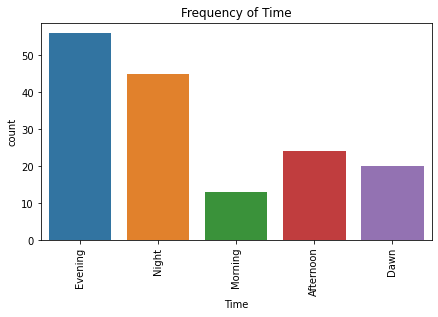

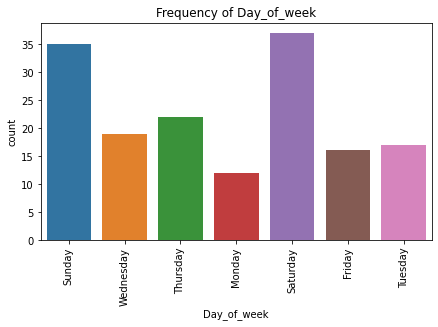

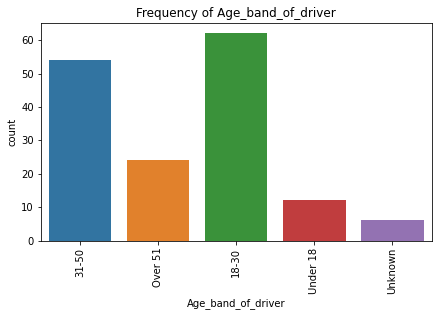

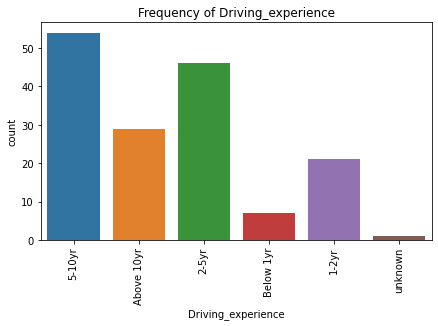

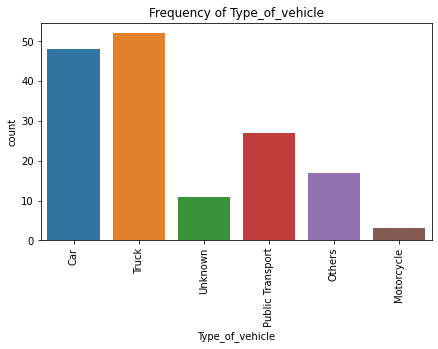

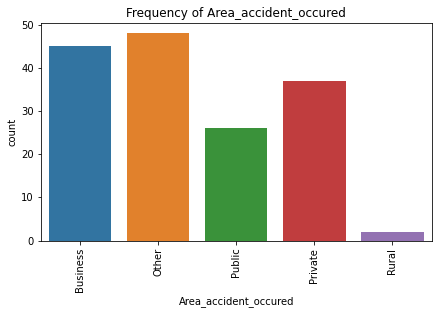

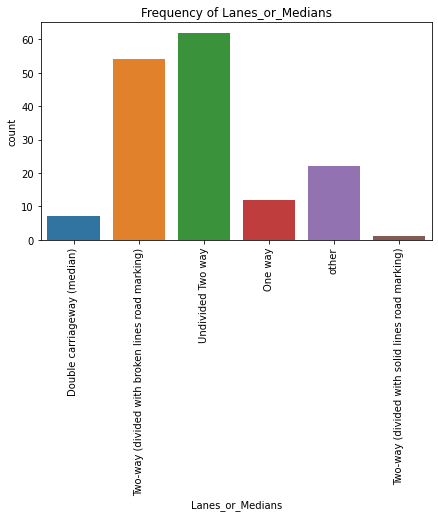

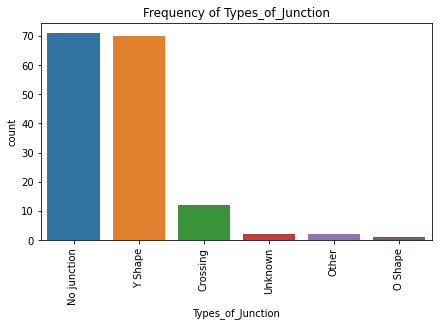

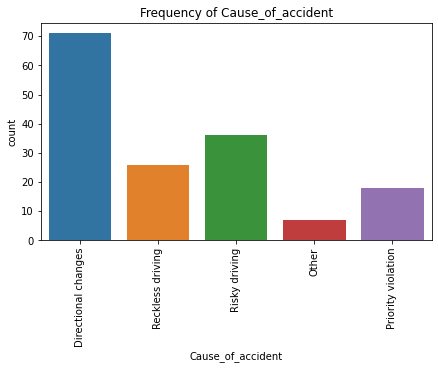

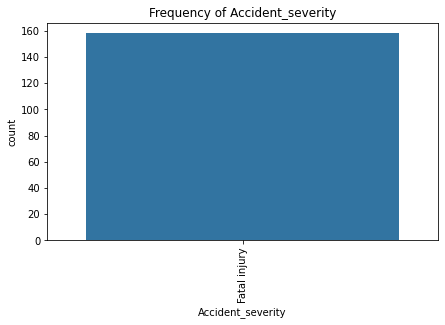

In [15]:
for column in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_fatal, x=column)
    plt.title(f'Frequency of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [16]:
cramer_v_result = calculate_cramers_v_for_all_vars(df_fatal)
print(cramer_v_result)

<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid valu

                           Time  Day_of_week  Age_band_of_driver  \
Time                        NaN     0.398425            0.248773   
Day_of_week            0.398425          NaN            0.285345   
Age_band_of_driver     0.248773     0.285345                 NaN   
Driving_experience     0.177987     0.205406            0.198724   
Type_of_vehicle        0.249771     0.200839            0.137910   
Area_accident_occured  0.139332     0.213796            0.181352   
Lanes_or_Medians       0.121578     0.187542            0.141732   
Types_of_Junction      0.354835     0.297350            0.153789   
Cause_of_accident      0.143003     0.206027            0.155406   
Accident_severity           NaN          NaN                 NaN   

                       Driving_experience  Type_of_vehicle  \
Time                             0.177987         0.249771   
Day_of_week                      0.205406         0.200839   
Age_band_of_driver               0.198724         0.137910   
Dri

<ipython-input-10-104818547b8a>:14: RuntimeWarning: invalid value encountered in true_divide
  v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


#### Com uma correlação baixa, mas no limite de moderada, optou-se demonstrar através de visualização em gráfico de barras a relação entre as variáveis período do dia e dia da semana para tentativa de previsão de fatores propícios a ocorrência de um acidente fatal

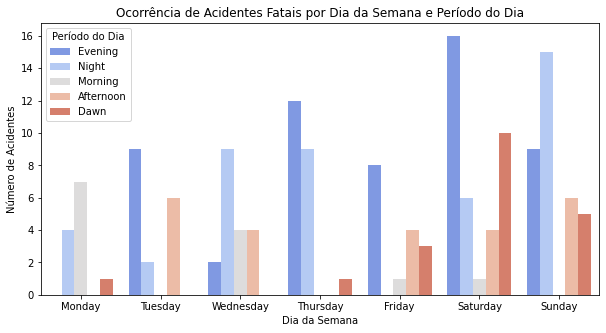

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_week', hue='Time', data=df_fatal, palette='coolwarm', 
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Ocorrência de Acidentes Fatais por Dia da Semana e Período do Dia')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.legend(title='Período do Dia', loc=2)
plt.xticks(rotation=0)
plt.show()

In [ ]:
del(df_road)

In [ ]:
del (df_fatal)